# Open TSNE

https://opentsne.readthedocs.io/en/latest/examples/01_simple_usage/01_simple_usage.html

In [35]:
from openTSNE import TSNE

#from examples import utils

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [6]:
from sklearn import datasets
data = datasets.load_digits()
X=data.data
y=data.target

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20)

In [8]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [10]:
embedding_train = tsne.fit(X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.37 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.08 seconds
===> Running optimization with exaggeration=12.00, lr=119.75 for 250 iterations...
Iteration   50, KL divergence 2.5060, 50 iterations in 51.1727 sec
Iteration  100, KL divergence 2.5199, 50 iterations in 48.1586 sec
Iteration  150, KL divergence 2.5140, 50 iterations in 47.9876 sec
Iteration  200, KL divergence 2.5113, 50 iterations in 48.4202 sec
Iteration  250, KL divergence 2.5101, 50 iterations in 47.4503 sec
   --> Time elapsed: 243.19 seconds
===> Running optimization with exaggera

In [13]:
embedding_test = embedding_train.transform(X_test)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 2850.0954, 50 iterations in 10.7085 sec
Iteration  100, KL divergence 2845.2690, 50 iterations in 10.5685 sec
Iteration  150, KL divergence 2838.9487, 50 iterations in 11.0794 sec
Iteration  200, KL divergence 2838.7757, 50 iterations in 10.8535 sec
Iteration  250, KL divergence 2834.7059, 50 iterations in 11.1526 sec
   --> Time elapsed: 54.36 seconds


In [17]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=10000)
log_clf.fit(embedding_train, y_train)

LogisticRegression(max_iter=10000)

In [18]:
log_clf.score(embedding_train,y_train)

0.919276270006959

In [19]:
log_clf.score(embedding_test,y_test)

0.8861111111111111

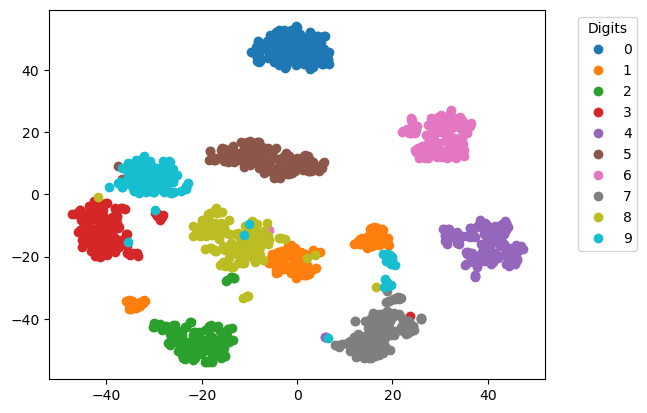

In [33]:
dvals=[0,1,2,3,4,5,6,7,8,9]
for j in dvals:
        plt.plot(embedding_train[y_train==j, 0], embedding_train[y_train==j, 1], "o",label=j)
plt.legend(title='Digits', bbox_to_anchor=(1.2, 1))